In [1]:
import multicarrier
import plots
import matplotlib.pyplot as plt

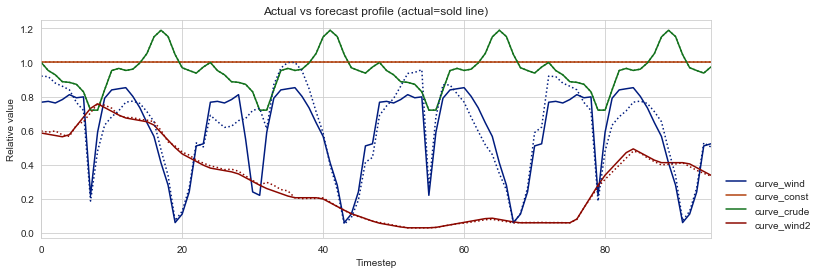

In [2]:
carrier_properties = {
    'gas':{'energy_value':40,
           'Tb_basetemp_K':273+15,
           'Pb_basepressure_kPa':101,
           'G_gravity':0.6,
           'Z_compressibility':0.9,
           'CO2content':5}, #5 kg per MWh
    'el':{'energy_value':1,
          'CO2content':0},
    'heat':{'CO2content':0},
    }

datafile = "data_example.xlsx"
data,profiles = multicarrier.read_data_from_xlsx(datafile,carrier_properties)

multicarrier.Plots.plotProfiles(profiles)

In [3]:
data['paramDevice'][17]['Emax']=5 # MWh - battery
data['paramDeviceEnergyInitially'][17]=2.5 # MWh - battery
mc = multicarrier.Multicarrier(loglevel="INFO")
mc.createModelInstance(data,profiles)

status = mc.solveMany(solver="cbc",time_end=48,write_yaml=False)

2020-01-16 16:17:12 INFO: TODO: objective function definition
2020-01-16 16:17:12 INFO: TODO: gas turbine power vs heat output
2020-01-16 16:17:12 INFO: TODO: startup cost
2020-01-16 16:17:12 INFO: TODO: el source: dieselgen, fuel, on-off variables
2020-01-16 16:17:12 INFO: TODO: el power balance constraint redundant?
2020-01-16 16:17:12 INFO: TODO: gas pressure bounds set by input parameters
2020-01-16 16:17:12 INFO: TODO: solve many data missing
2020-01-16 16:17:12 INFO: Solving timestep=0


TODO: electrical storage objective


2020-01-16 16:17:14 INFO: Solving timestep=4
2020-01-16 16:17:15 INFO: Solving timestep=8
2020-01-16 16:17:15 INFO: Solving timestep=12
2020-01-16 16:17:16 INFO: Solving timestep=16
2020-01-16 16:17:18 INFO: Solving timestep=20
2020-01-16 16:17:19 INFO: Solving timestep=24
2020-01-16 16:17:20 INFO: Solving timestep=28
2020-01-16 16:17:21 INFO: Solving timestep=32
2020-01-16 16:17:22 INFO: Solving timestep=36
2020-01-16 16:17:23 INFO: Solving timestep=40
2020-01-16 16:17:24 INFO: Solving timestep=44


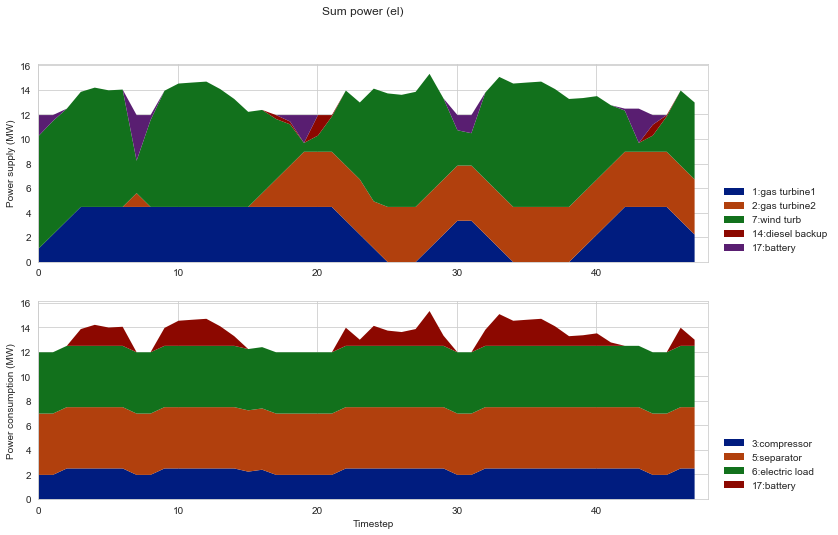

In [4]:
plots.plot_SumPowerMix(mc,carrier="el")

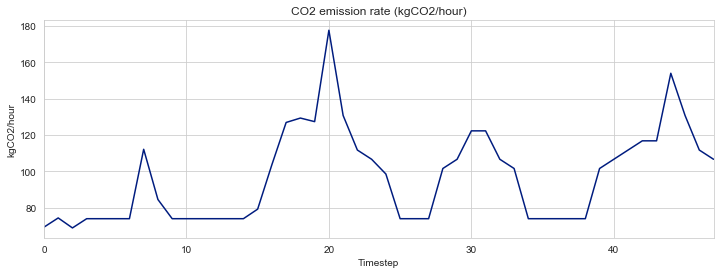

In [5]:
plots.plot_CO2(mc)

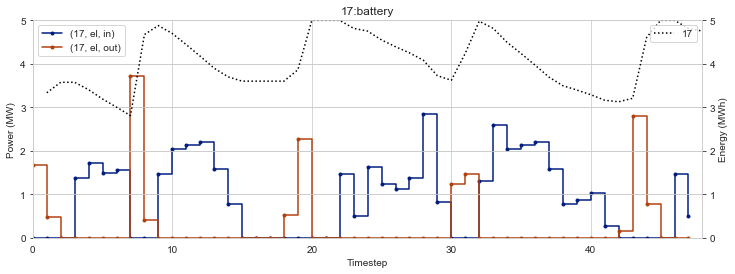

In [6]:
plots.plot_devicePowerEnergy(mc,dev=17)

In [9]:

mc2 = multicarrier.Multicarrier(loglevel="INFO")
data['paramDevice'][17]['Emax']=0 # MWh - battery
data['paramDeviceEnergyInitially'][17]=0 # MWh - battery
mc2.createModelInstance(data,profiles)
status2 = mc2.solveMany(solver="cbc",time_end=48,write_yaml=False)

2020-01-16 16:25:30 INFO: TODO: objective function definition
2020-01-16 16:25:30 INFO: TODO: gas turbine power vs heat output
2020-01-16 16:25:30 INFO: TODO: startup cost
2020-01-16 16:25:30 INFO: TODO: el source: dieselgen, fuel, on-off variables
2020-01-16 16:25:30 INFO: TODO: el power balance constraint redundant?
2020-01-16 16:25:30 INFO: TODO: gas pressure bounds set by input parameters
2020-01-16 16:25:30 INFO: TODO: solve many data missing
2020-01-16 16:25:30 INFO: Solving timestep=0


TODO: electrical storage objective


2020-01-16 16:25:31 INFO: Solving timestep=4
2020-01-16 16:25:31 INFO: Solving timestep=8
2020-01-16 16:25:32 INFO: Solving timestep=12
2020-01-16 16:25:33 INFO: Solving timestep=16
2020-01-16 16:25:34 INFO: Solving timestep=20
2020-01-16 16:25:35 INFO: Solving timestep=24
2020-01-16 16:25:35 INFO: Solving timestep=28
2020-01-16 16:25:36 INFO: Solving timestep=32
2020-01-16 16:25:36 INFO: Solving timestep=36
2020-01-16 16:25:37 INFO: Solving timestep=40
2020-01-16 16:25:38 INFO: Solving timestep=44


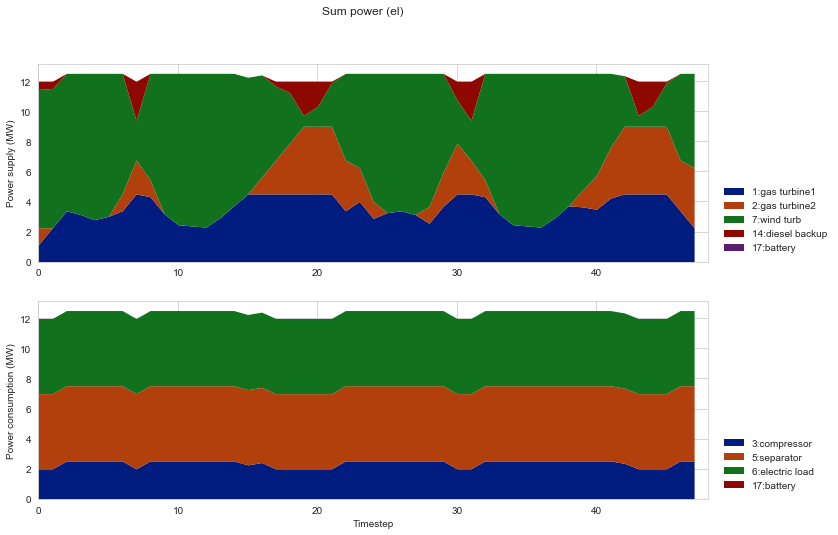

In [10]:
plots.plot_SumPowerMix(mc2,carrier="el")

WITH BATTERY: CO2 average emissions = 96.9173601520837 kgCO2/hour
WITHOUT BATTERY: CO2 average emissions = 102.6886172541665 kgCO2/hour


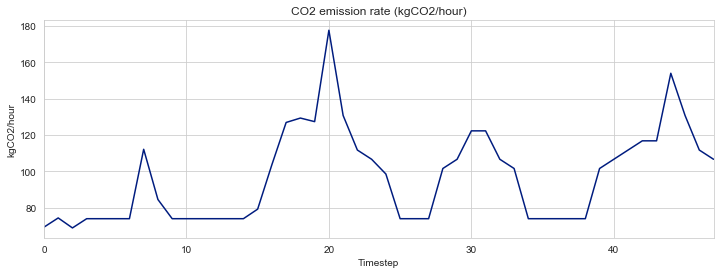

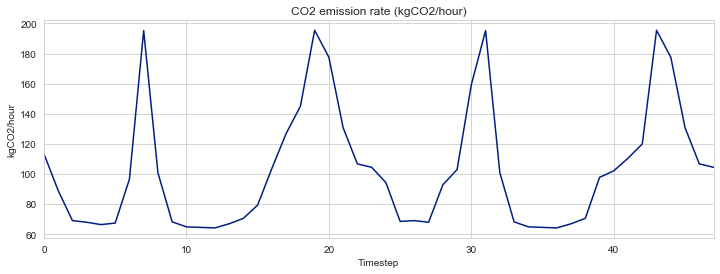

In [11]:
plots.plot_CO2(mc)
print("WITH BATTERY: CO2 average emissions = {} kgCO2/hour".format(mc._dfCO2.mean()))
plots.plot_CO2(mc2)
print("WITHOUT BATTERY: CO2 average emissions = {} kgCO2/hour".format(mc2._dfCO2.mean()))
